In [86]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [100]:
#Load Data
company = "FUTU"

start = dt.datetime(2016,1,1)
end = dt.datetime(2020,1,1)

data =web.DataReader(company, "yahoo", start, end)

In [101]:
#Prepare Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train  = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [102]:
#Build model
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.1))
model.add(Dense(units = 1))

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 30, batch_size =30)



Epoch 1/30
5/5 [==============================] - 6s 86ms/step - loss: 0.0134
Epoch 2/30
5/5 [==============================] - 0s 84ms/step - loss: 0.0065
Epoch 3/30
5/5 [==============================] - 0s 84ms/step - loss: 0.0054
Epoch 4/30
5/5 [==============================] - 0s 90ms/step - loss: 0.0041
Epoch 5/30
5/5 [==============================] - 0s 84ms/step - loss: 0.0041
Epoch 6/30
5/5 [==============================] - 0s 86ms/step - loss: 0.0038
Epoch 7/30
5/5 [==============================] - 0s 84ms/step - loss: 0.0037
Epoch 8/30
5/5 [==============================] - 0s 85ms/step - loss: 0.0032
Epoch 9/30
5/5 [==============================] - 0s 88ms/step - loss: 0.0031
Epoch 10/30
5/5 [==============================] - 0s 84ms/step - loss: 0.0030
Epoch 11/30
5/5 [==============================] - 0s 88ms/step - loss: 0.0021
Epoch 12/30
5/5 [==============================] - 0s 83ms/step - loss: 0.0024
Epoch 13/30
5/5 [==============================] - 0s 87ms/st

In [103]:
#Load Test Data
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(company, "yahoo", test_start, test_end)
actual_prices = test_data["Close"].values

total_dataset = pd.concat((data["Close"], test_data["Close"]), axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)



In [104]:
#make prediction on Test Data

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs [x - prediction_days : x, 0])
  

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


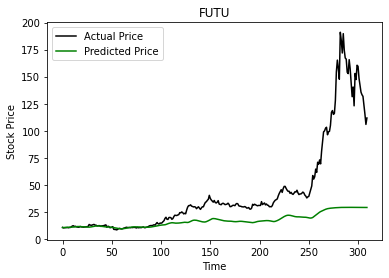

In [110]:
#plot the test prediction
plt.plot(actual_prices, color = "black", label = "Actual Price")
plt.plot(predicted_prices, color = "green", label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title(company)
plt.legend()
plt.show()

In [112]:
#Predict next date
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days: len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[29.065275]]
